## Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import pandas.io.data as web
from sklearn.decomposition import KernelPCA


//anaconda/lib/python2.7/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


### DAX Index and its 30 Stocks

In [43]:
symbols = ['ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE',
           'BMW.DE', 'CBK.DE', 'CON.DE', 'DAI.DE', 'DB1.DE',
           'DBK.DE', 'DPW.DE', 'DTE.DE', 'EOAN.DE', 'FME.DE',
           'FRE.DE', 'HEI.DE', 'HEN3.DE', 'IFX.DE', 'LHA.DE',
           'LIN.DE', 'LXS.DE', 'MRK.DE', 'MUV2.DE', 'RWE.DE',
           'SAP.DE', 'SDF.DE', 'SIE.DE', 'TKA.DE', 'VOW3.DE',
           '^GDAXI']

In [44]:
%%time
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='yahoo')['Close']  # 每个DAX是一列数据（DataFrame相当于字典sym是key，里面的数据是value）
# 从网上抓取收盘价
data = data.dropna()  # dropna方法丢弃缺失的数据

CPU times: user 399 ms, sys: 166 ms, total: 565 ms
Wall time: 6.61 s


In [45]:
#dax = pd.DataFrame(data.pop('^GDAXI'))
dax = pd.DataFrame(data.pop('^GDAXI'))  # .pop方法可以将所选列从原数据块中弹出，原数据块不再保留该列，返回pop出来的数据
# 所以dax中现在只有GDAXI一列数据，data中有30列数据

In [46]:
data[data.columns[:6]].head()  # 输出前六列数据的开头

,ADS.DE,ALV.DE,BAS.DE,BAYN.DE,BEI.DE,BMW.DE
Date,,,,,,
2010-01-04,38.505,88.54,44.850,56.40,46.445,32.050
2010-01-05,39.720,88.81,44.170,55.37,46.200,32.310
2010-01-06,39.400,89.50,44.450,55.02,46.165,32.810
2010-01-07,39.745,88.47,44.155,54.30,45.700,33.100
2010-01-08,39.600,87.99,44.020,53.82,44.380,32.655


In [47]:
#data[data.columns[:6]]

### Applying PCA

In [18]:
scale_function = lambda x: (x - x.mean()) / x.std()  # 数据标准化normalization

In [19]:
pca = KernelPCA().fit(data.apply(scale_function))  # 对标准化的数据进行主成分分析

In [20]:
len(pca.lambdas_)  # KernelPCA与传统PCA不一样，KernelPCA可以解释非线性的，所以把数据映射到高维变成线性再求特征值

910

In [21]:
pca.lambdas_[:10].round()  # 观察特征值情况 输出多少列，每一列精确到多少位

array([ 33633.,   6000.,   5387.,   2693.,   2019.,    859.,    743.,
          533.,    306.,    223.])

In [22]:
get_we = lambda x: x / x.sum()  # 计算特征值的比例 get weight

In [23]:
get_we(pca.lambdas_)[:10]  # 计算特征值的比例

array([ 0.63053835,  0.11249177,  0.10099791,  0.05047923,  0.03785934,
        0.01610878,  0.01392597,  0.00998948,  0.00574509,  0.00417324])

In [24]:
get_we(pca.lambdas_)[:5].sum()  # 观察发现，前五个主成分的累计贡献率已经接近95%，因此取五个主成分


0.93236660306205998

### Constructing a PCA Index

In [25]:
pca = KernelPCA(n_components=1).fit(data.apply(scale_function))  # 只取一个主成分
dax['PCA_1'] = pca.transform(-data)  # 把源数据转换成pca降维之后的数据，负号是KernelPCA方法得到的就是一个负值所以要加负号

In [26]:
?pca.transform

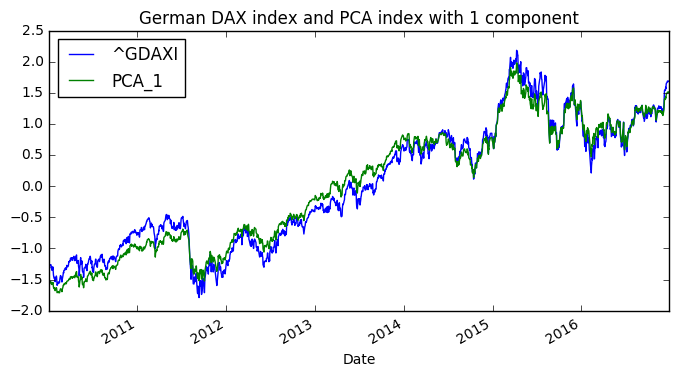

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline  
# 在ipythonnotebook执行
dax.apply(scale_function).plot(figsize=(8, 4), title = "German DAX index and PCA index with 1 component")
# tag: pca_1
# title: German DAX index and PCA index with 1 component
plt.show()

In [28]:
pca = KernelPCA(n_components=5).fit(data.apply(scale_function))
pca_components = pca.transform(-data)
weights = get_we(pca.lambdas_)
dax['PCA_5'] = np.dot(pca_components, weights)  # 矩阵相乘，对五个主成分得分按相应贡献率为权重相加与DAX标准化后的数据进行比较

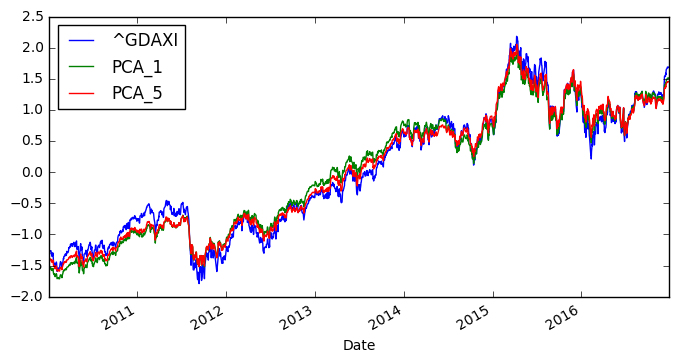

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
dax.apply(scale_function).plot(figsize=(8, 4))
# tag: pca_2
# title: German DAX index and PCA indices with 1 and 5 components
plt.show()